In [1]:
!pip install geopandas

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

C:\Users\ryaut\anaconda3\lib\site-packages\geopandas\_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
C:\Users\ryaut\AppData\Local\Temp\ipykernel_23648\1514355650.py:4: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/

In [2]:
ips = pd.read_csv('ips.csv')
lycee_pro = pd.read_csv('lycee_pro.csv')
specialites = pd.read_csv('specialites.csv').dropna(axis=1, how='all')
valeur_ajoutee_gen = pd.read_csv('valeur_ajoutee_gen.csv', low_memory = False).dropna(axis=1, how='all')
valeur_ajoutee_pro = pd.read_csv('valeur_ajoutee_pro.csv', low_memory = False).dropna(axis=1, how='all')

In [3]:
display(ips)
display(lycee_pro)
display(specialites)
display(valeur_ajoutee_gen)
display(valeur_ajoutee_pro)

,rentree_scolaire,academie,code_du_departement,departement,uai,nom_de_l_etablissment,code_insee_de_la_commune,nom_de_la_commune,secteur,type_de_lycee,effectifs_voie_gt,effectifs_voie_pro,effectifs_ensemble_gt_pro,ips_voie_gt,ips_voie_pro,ips_ensemble_gt_pro,ecart_type_de_l_ips_voie_gt,ecart_type_de_l_ips_voie_pro
0,2022-2023,LYON,1,AIN,0010001W,LYCEE PROFESSIONNEL ALEXANDRE BERARD LYCEE DES...,1004,AMBERIEU EN BUGEY,public,LP,NaN,583.0,583.0,NaN,91.5,91.5,NaN,27.2
1,2022-2023,LYON,1,AIN,0010006B,LYCEE POLYVALENT SAINT EXUPERY LYCEE DES METIE...,1033,VALSERHONE,public,LPO,556.0,334.0,890.0,99.2,84.2,93.6,33.3,24.8
2,2022-2023,LYON,1,AIN,0010013J,LYCEE GENERAL LALANDE,1053,BOURG EN BRESSE,public,LEGT,1028.0,NaN,1028.0,123.0,NaN,123.0,34.7,NaN
3,2022-2023,LYON,1,AIN,0010016M,LYCEE POLYVALENT JOSEPH MARIE CARRIAT,1053,BOURG EN BRESSE,public,LPO,1362.0,335.0,1697.0,111.7,98.8,109.2,32.9,30.2
4,2022-2023,LYON,1,AIN,0010069V,LYCEE GENERAL ET TECHNOLOGIQUE PRIVE ENSEMBLE ...,1034,BELLEY,privé sous contrat,LEGT,250.0,NaN,250.0,115.8,NaN,115.8,27.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,2022-2023,ORLEANS-TOURS,28,EURE-ET-LOIR,0280687V,LYCEE PROFESSIONNEL PRIVE DE COUASNON LYCEE DE...,28134,DREUX,privé sous contrat,LP,NaN,307.0,307.0,NaN,93.0,93.0,NaN,24.0
3596,2022-2023,RENNES,29,FINISTERE,0290010D,LYCEE GENERAL DE L HARTELOIRE,29019,BREST,public,LEGT,370.0,NaN,370.0,118.0,NaN,118.0,37.9,NaN
3597,2022-2023,RENNES,29,FINISTERE,0290034E,LYCEE GENERAL ET TECHNOLOGIQUE JEAN MARIE LE BRIS,29046,DOUARNENEZ,public,LEGT,353.0,NaN,353.0,114.5,NaN,114.5,31.4,NaN
3598,2022-2023,RENNES,29,FINISTERE,0290051Y,LYCEE GENERAL ET TECHNOLOGIQUE TRISTAN CORBIERE,29151,MORLAIX,public,LEGT,764.0,NaN,764.0,112.3,NaN,112.3,33.8,NaN


,rentree_scolaire,academie_2020,academie_2020_lib_l,numero_d_etablissement,patronyme,adresse_condensee,code_postal,commune_d_implantation,commune_d_implantation_lib_l,commune_et_arrondissement,commune_et_arrondissement_lib_l,secteur_d_enseignement_lib_l,mef_bcp_11,mef_bcp_11_lib_l,mef_bcp_6,mef_bcp_6_lib_l,nombre_d_eleves_total,nombre_d_eleves_filles,nombre_d_eleves_garcons
0,2019,12,NANCY-METZ,0880064S,EMILE GALLE,E.GALLE R.A DEDECKER,88151,88465,CAPAVENIR VOSGES,88465,CAPAVENIR VOSGES,SECTEUR PUBLIC,23830033003,TLE PRO3 ACC.SOINS-S.PERS. OPT.A DOMICILE,238300,BAC PRO EN 3 ANS : TERMINALE PRO,26,24.0,2.0
1,2019,12,NANCY-METZ,0880064S,EMILE GALLE,E.GALLE R.A DEDECKER,88151,88465,CAPAVENIR VOSGES,88465,CAPAVENIR VOSGES,SECTEUR PUBLIC,23830033004,TLE PRO3 ACC.SOINS-S.PERS. OPT.EN STRUCTUR,238300,BAC PRO EN 3 ANS : TERMINALE PRO,43,40.0,3.0
2,2019,12,NANCY-METZ,0880101G,NOTRE DAME - SAINT JOSEPH,NOTRE DAME-ST JOSEPH R THIERS,88012,88160,EPINAL,88160,EPINAL,SECTEUR PRIVE,32211020008,1BTS2 TECHNICO-COMMERCIAL,322110,BTS EN 2 ANS : 1ERE ANNEE,30,4.0,26.0
3,2019,12,NANCY-METZ,0880120C,NOTRE DAME DE LA PROVIDENCE,N.D.LA PROVIDENCE 14 R PASTEUR,88100,88413,SAINT-DIE-DES-VOSGES,88413,SAINT-DIE-DES-VOSGES,SECTEUR PRIVE,23830032207,TLE PRO3 REAL.PR.IMPR.PLURI.OPTA.PR.GRAPH.,238300,BAC PRO EN 3 ANS : TERMINALE PRO,8,1.0,7.0
4,2019,12,NANCY-METZ,0880133S,JEANNE D'ARC,JEANNE D'ARC 1 AVENUE CHANZY,88600,88078,BRUYERES,88078,BRUYERES,SECTEUR PRIVE,23830034403,TLE PRO3 METIERS DE LA SECURITE,238300,BAC PRO EN 3 ANS : TERMINALE PRO,25,7.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177795,2019,18,ORLEANS-TOURS,0280684S,NOTRE DAME,NOTRE DAME LES VAUX,28240,28354,SAINT-MAURICE-SAINT-GERMAIN,28354,SAINT-MAURICE-SAINT-GERMAIN,SECTEUR PRIVE,23830022105,TLE PRO3 BOULANGER-PATISSIER,238300,BAC PRO EN 3 ANS : TERMINALE PRO,14,4.0,10.0
177796,2019,18,ORLEANS-TOURS,0280684S,NOTRE DAME,NOTRE DAME LES VAUX,28240,28354,SAINT-MAURICE-SAINT-GERMAIN,28354,SAINT-MAURICE-SAINT-GERMAIN,SECTEUR PRIVE,23830033403,TLE PRO3 COMMERC. SERVICES EN RESTAURATION,238300,BAC PRO EN 3 ANS : TERMINALE PRO,7,1.0,6.0
177797,2019,18,ORLEANS-TOURS,0280687V,DE COUASNON,DE COUASNON 37 RUE DE MORONVAL,28100,28134,DREUX,28134,DREUX,SECTEUR PRIVE,23220031214,2CAP2 EMPLOYE COMMERCE MULTISPECIALITES,232200,CAP EN 2 ANS : 2EME ANNEE,11,2.0,9.0
177798,2019,18,ORLEANS-TOURS,0280687V,DE COUASNON,DE COUASNON 37 RUE DE MORONVAL,28100,28134,DREUX,28134,DREUX,SECTEUR PRIVE,23820033002,1RE PRO3 SERVICES PROXIMITE VIE LOCALE,238200,BAC PRO EN 3 ANS : 1ERE PRO,15,7.0,8.0


,rentree_scolaire,region_academique,academie,departement,commune,numero_etablissement,denomination,patronyme,secteur,effectif_total_en_premiere_generale,...,15_langues_litt_et_cultures_etra_et_r_sciences_economiques_et_sociales_sciences_de_la_vie_et_de_la_t,15_langues_litt_et_cultures_etra_et_r_sciences_economiques_et_sociales_sciences_de_la_vie_et_de_la_0,16_langues_litt_et_cultures_etra_et_r_mathematiques_sciences_de_la_vie_et_de_la_terre_filles,16_langues_litt_et_cultures_etra_et_r_mathematiques_sciences_de_la_vie_et_de_la_terre_garcons,17_hist_geo_geopolitique_sc_politiques_mathematiques_sciences_de_la_vie_et_de_la_terre_filles,17_hist_geo_geopolitique_sc_politiques_mathematiques_sciences_de_la_vie_et_de_la_terre_garcons,18_hist_geo_geopolitique_sc_politiques_langues_litt_et_cultures_etra_et_r_mathematiques_filles,18_hist_geo_geopolitique_sc_politiques_langues_litt_et_cultures_etra_et_r_mathematiques_garcons,autres_combinaisons_filles,autres_combinaisons_garcons
0,2020,AUVERGNE-RHONE-ALPES,CLERMONT-FERRAND,ALLIER,CUSSET,0030051P,LGT LYCEE DES METIERS,ALBERT LONDRES,PUBLIC,378,...,0,0,0,0,0,0,0,0,19,9
1,2020,AUVERGNE-RHONE-ALPES,CLERMONT-FERRAND,ALLIER,MONTLUCON,0030025L,LYCEE GENERAL,MADAME DE STAEL,PUBLIC,350,...,4,1,1,0,3,0,0,0,81,36
2,2020,AUVERGNE-RHONE-ALPES,CLERMONT-FERRAND,CANTAL,AURILLAC,0150646W,LYCEE GENERAL,EMILE DUCLAUX,PUBLIC,231,...,4,0,1,0,1,0,4,1,31,15
3,2020,AUVERGNE-RHONE-ALPES,CLERMONT-FERRAND,CANTAL,MAURIAC,0150747F,LPO LYCEE DES METIERS,NaN,PUBLIC,50,...,0,0,0,0,0,0,0,0,9,1
4,2020,AUVERGNE-RHONE-ALPES,CLERMONT-FERRAND,CANTAL,SAINT-FLOUR,0150030B,LYCEE POLYVALENT,DE HAUTE AUVERGNE,PUBLIC,127,...,4,0,1,3,1,3,0,1,19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,2020,GRAND EST,NANCY-METZ,MOSELLE,METZ,0570057C,LYCEE GENERAL ET TECHNOLOGIQUE,ROBERT SCHUMAN,PUBLIC,158,...,0,3,3,2,1,10,1,1,25,9
4496,2020,GRAND EST,NANCY-METZ,VOSGES,MIRECOURT,0880036L,LYCEE GENERAL ET TECHNOLOGIQUE,JEAN-BAPTISTE VUILLAUME,PUBLIC,142,...,2,1,1,0,2,4,0,0,12,2
4497,2020,GRAND EST,NANCY-METZ,VOSGES,REMIREMONT,0880153N,LPO LYCEE DES METIERS,FILIERE BOIS ANDRE MALRAUX,PUBLIC,201,...,2,0,2,0,0,1,4,1,14,11
4498,2020,GRAND EST,REIMS,ARDENNES,CHARLEVILLE-MEZIERES,0080027L,LYCEE GENERAL ET TECHNOLOGIQUE,MONGE,PUBLIC,96,...,5,2,0,0,0,1,0,0,7,7


,etablissement,annee,ville,code_etablissement,commune,academie,departement,secteur_public_pu_prive_pr,effectif_presents_serie_l,effectif_presents_serie_es,...,taux_men_brut_gnle,va_men_gnle,nombre_de_mentions_tb_avec_felicitations_g,nombre_de_mentions_tb_sans_felicitations_g,nombre_de_mentions_b_g,nombre_de_mentions_ab_g,nombre_de_mentions_tb_avec_felicitations_t,nombre_de_mentions_tb_sans_felicitations_t,nombre_de_mentions_b_t,nombre_de_mentions_ab_t
0,LYCEE ROLLINAT,2012,ARGENTON SUR CREUSE,0360002G,36006,ORLEANS-TOURS,INDRE,public,12.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LYCEE SAINT GILLES (GENERAL ET TECHNO.),2012,VEIGNE,0371184L,37266,ORLEANS-TOURS,INDRE ET LOIRE,privé sous contrat,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,LYCEE JEAN MONNET,2012,JOUE LES TOURS,0371417P,37122,ORLEANS-TOURS,INDRE ET LOIRE,public,45.0,139.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,LYCEE ISER - BORDIER,2012,GRENOBLE,0380018N,38185,GRENOBLE,ISERE,privé sous contrat,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,LYCEE DE LA MATHEYSINE (GENERAL ET TECHNO.),2012,LA MURE D ISERE,0380049X,38269,GRENOBLE,ISERE,public,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25495,LYCEE JEAN MONNET,2015,STRASBOURG,0670078W,67482,STRASBOURG,BAS RHIN,public,33.0,65.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25496,LYCEE STANISLAS (GENERAL ET TECHNO.),2015,WISSEMBOURG,0670114K,67544,STRASBOURG,BAS RHIN,public,25.0,85.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25497,INSTITUTION STE PHILOMENE,2015,HAGUENAU,0671602C,67180,STRASBOURG,BAS RHIN,privé sous contrat,NaN,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25498,INSTIT.LA DOCTRINE CHRETIENNE,2015,STRASBOURG,0671611M,67482,STRASBOURG,BAS RHIN,privé sous contrat,11.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,etablissement,code_etablissement,annee,ville,commune,academie,departement,secteur_public_1_prive_2,effectifs_presents_specialites_pluri_technologiques,effectifs_presents_transformations,...,va_reu_pluri_serv,va_reu_echanges,va_reu_communication,va_reu_serv_pers,va_reu_serv_collec,va_reu_services,va_reu_total,va_acc_seconde,va_acc_premiere,va_acc_terminale
0,LYCEE PROFESSIONNEL MARCEL DEPREZ,0750788Z,2016,PARIS 11,75111,PARIS,PARIS,public,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,17,18,16,16
1,LYCEE PORTE OCEANE (PROFESSIONNEL),0760054W,2016,LE HAVRE,76351,NORMANDIE,SEINE MARITIME,public,NaN,NaN,...,-25,NaN,NaN,NaN,NaN,-25,-25,-5,-2,-9
2,LYCEE PROFESSIONNEL URUGUAY FRANCE,0770919F,2016,AVON,77014,CRETEIL,SEINE ET MARNE,public,NaN,NaN,...,-9,NaN,NaN,-4,NaN,-5,-5,-6,-8,-1
3,LYCEE PROFESSIONNEL JULES FERRY,0770924L,2016,COULOMMIERS,77131,CRETEIL,SEINE ET MARNE,public,NaN,NaN,...,NaN,NaN,NaN,-15,NaN,-15,-15,-5,-7,-9
4,LYCEE PROFESSIONNEL PIERRE DE COUBERTIN,0770932V,2016,MEAUX,77284,CRETEIL,SEINE ET MARNE,public,NaN,NaN,...,NaN,NaN,NaN,NaN,-7.0,ND,-2,-5,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22295,LYCEE PROFESSIONNEL EDMOND LABBE,0690129R,2015,OULLINS,69149,LYON,RHONE,public,NaN,19.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3,-1,3,7
22296,LYCEE PROFESSIONNEL NOTRE DAME,0691465T,2015,GIVORS,69091,LYON,RHONE,privé sous contrat,NaN,NaN,...,19,13,NaN,NaN,NaN,16,16,4,11,15
22297,LYCEE PROFESSIONNEL FRANCOIS CEVERT,0693095P,2015,ECULLY,69081,LYON,RHONE,public,NaN,NaN,...,NaN,10,NaN,NaN,NaN,10,1,-5,4,3
22298,LYCEE PROFESSIONNEL DON BOSCO,0693371P,2015,LYON 05,69385,LYON,RHONE,privé sous contrat,NaN,NaN,...,NaN,NaN,NaN,1,NaN,1,1,2,8,3


In [4]:
ips.rename(columns={'uai': 'code_etablissement'}, inplace=True)
lycee_pro.rename(columns={'numero_d_etablissement': 'code_etablissement'}, inplace=True)
specialites.rename(columns={'numero_etablissement': 'code_etablissement'}, inplace=True)

In [5]:
pro = lycee_pro.merge(ips, on = 'code_etablissement')
lycee_pro_merged = pro.merge(valeur_ajoutee_pro, on = 'code_etablissement')
lycee_pro_merged

,rentree_scolaire_x,academie_2020,academie_2020_lib_l,code_etablissement,patronyme,adresse_condensee,code_postal,commune_d_implantation,commune_d_implantation_lib_l,commune_et_arrondissement,...,va_reu_pluri_serv,va_reu_echanges,va_reu_communication,va_reu_serv_pers,va_reu_serv_collec,va_reu_services,va_reu_total,va_acc_seconde,va_acc_premiere,va_acc_terminale
0,2019,13,POITIERS,0160792Z,SILLAC,360 RTE DE BORDEAUX(SILLAC),16007,16015,ANGOULEME,16015,...,NaN,NaN,NaN,NaN,NaN,NaN,-11,-15,-4,-5
1,2019,13,POITIERS,0160792Z,SILLAC,360 RTE DE BORDEAUX(SILLAC),16007,16015,ANGOULEME,16015,...,NaN,NaN,NaN,NaN,NaN,NaN,-11,-15,-4,-5
2,2019,13,POITIERS,0160792Z,SILLAC,360 RTE DE BORDEAUX(SILLAC),16007,16015,ANGOULEME,16015,...,NaN,NaN,NaN,NaN,NaN,NaN,-11,-15,-4,-5
3,2019,13,POITIERS,0160792Z,SILLAC,360 RTE DE BORDEAUX(SILLAC),16007,16015,ANGOULEME,16015,...,NaN,NaN,NaN,NaN,NaN,NaN,-11,-15,-4,-5
4,2019,13,POITIERS,0160792Z,SILLAC,360 RTE DE BORDEAUX(SILLAC),16007,16015,ANGOULEME,16015,...,NaN,NaN,NaN,NaN,NaN,NaN,-11,-15,-4,-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1760827,2019,16,TOULOUSE,0090006H,JOSEPH MARIE JACQUARD,JO MA JACQUARD R JACQUARD,9300,9160,LAVELANET,9160,...,5,10,NaN,NaN,NaN,8,3,-14,-16,-6
1760828,2019,16,TOULOUSE,0090006H,JOSEPH MARIE JACQUARD,JO MA JACQUARD R JACQUARD,9300,9160,LAVELANET,9160,...,5,10,NaN,NaN,NaN,8,3,-14,-16,-6
1760829,2019,16,TOULOUSE,0090006H,JOSEPH MARIE JACQUARD,JO MA JACQUARD R JACQUARD,9300,9160,LAVELANET,9160,...,5,10,NaN,NaN,NaN,8,3,-14,-16,-6
1760830,2019,16,TOULOUSE,0090006H,JOSEPH MARIE JACQUARD,JO MA JACQUARD R JACQUARD,9300,9160,LAVELANET,9160,...,5,10,NaN,NaN,NaN,8,3,-14,-16,-6


In [6]:
gen = specialites.merge(ips, on = 'code_etablissement', how = 'left')
lycee_gen_merged = gen.merge(valeur_ajoutee_gen, on = 'code_etablissement')
lycee_gen_merged

,rentree_scolaire_x,region_academique,academie_x,departement_x,commune_x,code_etablissement,denomination,patronyme,secteur_x,effectif_total_en_premiere_generale,...,taux_men_brut_gnle,va_men_gnle,nombre_de_mentions_tb_avec_felicitations_g,nombre_de_mentions_tb_sans_felicitations_g,nombre_de_mentions_b_g,nombre_de_mentions_ab_g,nombre_de_mentions_tb_avec_felicitations_t,nombre_de_mentions_tb_sans_felicitations_t,nombre_de_mentions_b_t,nombre_de_mentions_ab_t
0,2020,AUVERGNE-RHONE-ALPES,CLERMONT-FERRAND,HAUTE-LOIRE,YSSINGEAUX,0430065M,LYCEE GEN.ET TECHNOL.PRIVE,SAINT-GABRIEL,PRIVE SOUS CONTRAT,68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,AUVERGNE-RHONE-ALPES,CLERMONT-FERRAND,HAUTE-LOIRE,YSSINGEAUX,0430065M,LYCEE GEN.ET TECHNOL.PRIVE,SAINT-GABRIEL,PRIVE SOUS CONTRAT,68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,AUVERGNE-RHONE-ALPES,CLERMONT-FERRAND,HAUTE-LOIRE,YSSINGEAUX,0430065M,LYCEE GEN.ET TECHNOL.PRIVE,SAINT-GABRIEL,PRIVE SOUS CONTRAT,68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020,AUVERGNE-RHONE-ALPES,CLERMONT-FERRAND,HAUTE-LOIRE,YSSINGEAUX,0430065M,LYCEE GEN.ET TECHNOL.PRIVE,SAINT-GABRIEL,PRIVE SOUS CONTRAT,68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020,AUVERGNE-RHONE-ALPES,CLERMONT-FERRAND,HAUTE-LOIRE,YSSINGEAUX,0430065M,LYCEE GEN.ET TECHNOL.PRIVE,SAINT-GABRIEL,PRIVE SOUS CONTRAT,68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37813,2020,GRAND EST,NANCY-METZ,MOSELLE,METZ,0570057C,LYCEE GENERAL ET TECHNOLOGIQUE,ROBERT SCHUMAN,PUBLIC,158,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37814,2020,GRAND EST,NANCY-METZ,MOSELLE,METZ,0570057C,LYCEE GENERAL ET TECHNOLOGIQUE,ROBERT SCHUMAN,PUBLIC,158,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37815,2020,GRAND EST,NANCY-METZ,MOSELLE,METZ,0570057C,LYCEE GENERAL ET TECHNOLOGIQUE,ROBERT SCHUMAN,PUBLIC,158,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37816,2020,GRAND EST,NANCY-METZ,MOSELLE,METZ,0570057C,LYCEE GENERAL ET TECHNOLOGIQUE,ROBERT SCHUMAN,PUBLIC,158,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Quelques statistiques descriptives :

#### IPS :

In [7]:
ips.describe()

,code_du_departement,code_insee_de_la_commune,effectifs_voie_gt,effectifs_voie_pro,effectifs_ensemble_gt_pro,ips_voie_gt,ips_voie_pro,ips_ensemble_gt_pro,ecart_type_de_l_ips_voie_gt,ecart_type_de_l_ips_voie_pro
count,3600.000000,3600.000000,2508.000000,2045.000000,3600.000000,2508.000000,2045.000000,3600.000000,2508.000000,2045.000000
mean,14.204167,14354.733889,569.892344,211.845966,517.365278,115.960167,93.715061,107.364500,30.303907,26.078289
std,6.116743,6134.858499,408.098943,121.940267,385.793869,11.918930,10.561153,15.649288,4.074782,3.906233
min,1.000000,1004.000000,8.000000,6.000000,39.000000,87.700000,69.600000,69.600000,19.400000,17.600000
25%,11.000000,11076.000000,256.000000,113.000000,197.000000,110.200000,86.600000,94.100000,27.600000,23.700000
50%,13.000000,13211.000000,482.000000,210.000000,406.000000,113.900000,92.700000,107.300000,29.900000,25.300000
75%,18.000000,18197.000000,795.000000,283.000000,778.000000,124.500000,101.300000,117.800000,33.425000,28.100000
max,29.000000,29151.000000,1627.000000,583.000000,1768.000000,146.600000,116.400000,146.600000,40.300000,38.800000


In [8]:
ips['academie'].value_counts()

AIX-MARSEILLE       1110
NICE                 325
POITIERS             324
NORMANDIE            311
RENNES               205
GRENOBLE             176
LIMOGES              156
DIJON                144
REIMS                144
TOULOUSE             144
BORDEAUX             120
ORLEANS-TOURS        117
BESANCON             111
MONTPELLIER           72
CLERMONT-FERRAND      63
LYON                  45
AMIENS                33
Name: academie, dtype: int64

In [9]:
ips['secteur'].value_counts()

public                2145
privé sous contrat    1455
Name: secteur, dtype: int64

In [10]:
print("Effectifs voie gt :", ips['effectifs_voie_gt'].sum())
print("Effectifs voie pro :", ips['effectifs_voie_pro'].sum())
print("Effectifs totaux :", ips['effectifs_ensemble_gt_pro'].sum())
print("Pourcentage gt :", ips['effectifs_voie_gt'].sum()/ips['effectifs_ensemble_gt_pro'].sum())

Effectifs voie gt : 1429290.0
Effectifs voie pro : 433225.0
Effectifs totaux : 1862515.0
Pourcentage gt : 0.767397846460297


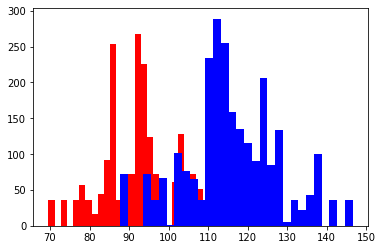

In [11]:
plt.hist(ips['ips_voie_pro'].dropna().tolist(), bins = 30, color = 'r')
plt.hist(ips['ips_voie_gt'].dropna().tolist(), bins = 30, color = 'b')
plt.show()

In [12]:
academie_url = 'http://osm13.openstreetmap.fr/~cquest/openfla/export/academies-20160209-shp.zip'

In [13]:
donnees_shapefile = gpd.read_file(academie_url)

In [14]:
donnees_shapefile

,name,vacances,wikipedia,geometry
0,Académie d'Aix-Marseille,Zone B,fr:Académie d'Aix-Marseille,"MULTIPOLYGON (((4.23013 43.46039, 4.23025 43.4..."
1,Académie d'Amiens,Zone B,fr:Académie d'Amiens (éducation),"MULTIPOLYGON (((1.38014 50.06499, 1.38214 50.0..."
2,Académie de Besançon,Zone A,fr:Académie de Besançon,"MULTIPOLYGON (((5.25202 46.94451, 5.25208 46.9..."
3,Académie de Bordeaux,Zone A,fr:Académie de Bordeaux (éducation),"MULTIPOLYGON (((-1.79102 43.37292, -1.79048 43..."
4,Académie de Caen,Zone B,fr:Académie de Caen (éducation),"MULTIPOLYGON (((-1.94877 49.71649, -1.94836 49..."
5,Académie de Clermont-Ferrand,Zone A,fr:Académie de Clermont-Ferrand,"POLYGON ((2.06290 44.97664, 2.06355 44.97666, ..."
6,Académie de Corse,None,fr:Académie de Corse,"MULTIPOLYGON (((8.53996 42.23689, 8.54030 42.2..."
7,Académie de Créteil,Zone C,fr:Académie de Créteil,"POLYGON ((2.28828 48.95840, 2.28834 48.95848, ..."
8,Académie de Dijon,Zone A,fr:Académie de Dijon (éducation),"POLYGON ((2.84448 47.54488, 2.84596 47.54546, ..."
9,Académie de Grenoble,Zone A,fr:Académie de Grenoble,"POLYGON ((3.86110 44.71118, 3.86110 44.71151, ..."


(41.0, 52.0)

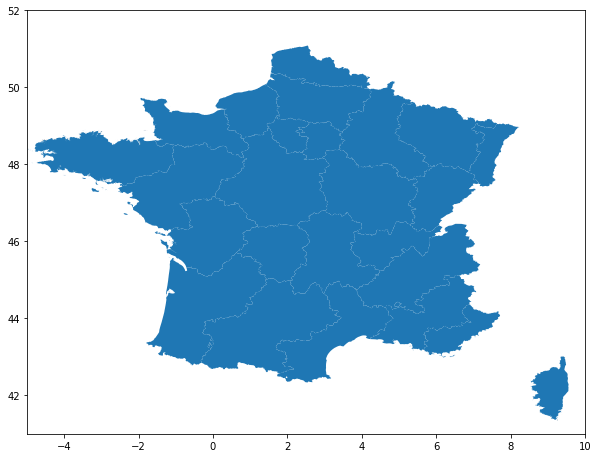

In [15]:
fig, ax = plt.subplots(figsize=(10, 10))

# Définir les limites de zoom (latitude, longitude)
latitude_min, latitude_max = 41, 52  # Modifier ces valeurs selon votre besoin
longitude_min, longitude_max = -5, 10  # Modifier ces valeurs selon votre besoin

# Afficher la carte avec les limites de zoom spécifiées
donnees_shapefile.plot(ax=ax)
ax.set_xlim(longitude_min, longitude_max)
ax.set_ylim(latitude_min, latitude_max)

#### Lycee_pro :

In [16]:
lycee_pro['academie_2020_lib_l'].value_counts()

NANTES           50390
RENNES           43000
TOULOUSE         36800
STRASBOURG       25000
POITIERS         18922
ORLEANS-TOURS     3160
NANCY-METZ         528
Name: academie_2020_lib_l, dtype: int64

In [17]:
lycee_pro['mef_bcp_6_lib_l'].value_counts()

BAC PRO EN 3 ANS : 1ERE PRO                 34497
BAC PRO EN 3 ANS : TERMINALE PRO            34175
BAC PRO EN 3 ANS : 2NDE PRO                 29298
BTS EN 2 ANS : 2EME ANNEE                   20769
BTS EN 2 ANS : 1ERE ANNEE                   18489
CAP EN 2 ANS : 1ERE ANNEE                   15808
CAP EN 2 ANS : 2EME ANNEE                   15173
MENTION COMPLEMENTAIRE                       2280
CAP EN 1 AN                                  1073
PREPARATION DIVERSE NIVEAU_5                  700
DIPLOME DE COMPTABILITE ET GESTION 3E AN      600
CAP AGRICOLE EN 2 ANS : 1ERE ANNEE            500
2MADE3 DN DES METIERS D'ART ET DU DESIGN      500
1MADE3 DN DES METIERS D'ART ET DU DESIGN      417
BMA EN 2 ANS : 2EME ANNEE                     361
DIPLOME DE COMPTABILITE ET GESTION 2E AN      300
PREPARATION DIVERSE PRE-BAC                   300
DIPLOME DE COMPTABILITE ET GESTION 1E AN      300
DCESF                                         300
DSAA : 2EME ANNEE                             200


In [18]:
print("Nombre d'élèves :", lycee_pro['nombre_d_eleves_total'].sum())
print("Nombre de filles :", lycee_pro['nombre_d_eleves_filles'].sum())
print("Pourcentage de filles :", lycee_pro['nombre_d_eleves_filles'].sum()/lycee_pro['nombre_d_eleves_total'].sum())

Nombre d'élèves : 3373825
Nombre de filles : 1422912.0
Pourcentage de filles : 0.42175038717183017


#### Specialites :

In [19]:
specialites.columns

Index(['rentree_scolaire', 'region_academique', 'academie', 'departement',
       'commune', 'code_etablissement', 'denomination', 'patronyme', 'secteur',
       'effectif_total_en_premiere_generale', 'effectif_total_filles',
       'effectif_total_garcons',
       '0105_humanites_litterature_et_philosophie_filles',
       '0105_humanites_litterature_et_philosophie_garcons',
       '0241_litterature_et_lca_latin_filles',
       '0241_litterature_et_lca_latin_garcons',
       '0242_litterature_et_lca_grec_filles',
       '0242_litterature_et_lca_grec_garcons',
       '0300_langues_litterature_et_cultures_etrangeres_et_regionales_filles',
       '0300_langues_litterature_et_cultures_etrangeres_et_regionales_garcons',
       '0439_hist_geo_geopolitique_sc_politiques_filles',
       '0439_hist_geo_geopolitique_sc_politiques_garcons',
       '0507_sciences_economiques_et_sociales_filles',
       '0507_sciences_economiques_et_sociales_garcons',
       '0613_mathematiques_filles', '0613_mathe

#### Valeur_ajoutee_gen :

In [24]:
valeur_ajoutee_gen.columns.tolist()

['etablissement',
 'annee',
 'ville',
 'code_etablissement',
 'commune',
 'academie',
 'departement',
 'secteur_public_pu_prive_pr',
 'effectif_presents_serie_l',
 'effectif_presents_serie_es',
 'effectif_presents_serie_s',
 'effectif_presents_serie_stg',
 'effectif_presents_serie_sti2d',
 'effectif_presents_serie_std2a',
 'effectif_presents_serie_stmg',
 'effectif_presents_serie_sti',
 'effectif_presents_serie_stl',
 'effectif_presents_serie_st2s',
 'effectif_presents_serie_musiq_danse',
 'effectif_presents_serie_hotellerie',
 'effectif_presents_total_series',
 'taux_brut_de_reussite_serie_l',
 'taux_brut_de_reussite_serie_es',
 'taux_brut_de_reussite_serie_s',
 'taux_brut_de_reussite_serie_stg',
 'taux_brut_de_reussite_serie_sti2d',
 'taux_brut_de_reussite_serie_std2a',
 'taux_brut_de_reussite_serie_stmg',
 'taux_brut_de_reussite_serie_sti',
 'taux_brut_de_reussite_serie_stl',
 'taux_brut_de_reussite_serie_st2s',
 'taux_brut_de_reussite_serie_musiq_danse',
 'taux_brut_de_reussite_ser

In [28]:
valeur_ajoutee_gen

,etablissement,annee,ville,code_etablissement,commune,academie,departement,secteur_public_pu_prive_pr,effectif_presents_serie_l,effectif_presents_serie_es,...,taux_men_brut_gnle,va_men_gnle,nombre_de_mentions_tb_avec_felicitations_g,nombre_de_mentions_tb_sans_felicitations_g,nombre_de_mentions_b_g,nombre_de_mentions_ab_g,nombre_de_mentions_tb_avec_felicitations_t,nombre_de_mentions_tb_sans_felicitations_t,nombre_de_mentions_b_t,nombre_de_mentions_ab_t
0,LYCEE ROLLINAT,2012,ARGENTON SUR CREUSE,0360002G,36006,ORLEANS-TOURS,INDRE,public,12.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LYCEE SAINT GILLES (GENERAL ET TECHNO.),2012,VEIGNE,0371184L,37266,ORLEANS-TOURS,INDRE ET LOIRE,privé sous contrat,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,LYCEE JEAN MONNET,2012,JOUE LES TOURS,0371417P,37122,ORLEANS-TOURS,INDRE ET LOIRE,public,45.0,139.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,LYCEE ISER - BORDIER,2012,GRENOBLE,0380018N,38185,GRENOBLE,ISERE,privé sous contrat,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,LYCEE DE LA MATHEYSINE (GENERAL ET TECHNO.),2012,LA MURE D ISERE,0380049X,38269,GRENOBLE,ISERE,public,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25495,LYCEE JEAN MONNET,2015,STRASBOURG,0670078W,67482,STRASBOURG,BAS RHIN,public,33.0,65.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25496,LYCEE STANISLAS (GENERAL ET TECHNO.),2015,WISSEMBOURG,0670114K,67544,STRASBOURG,BAS RHIN,public,25.0,85.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25497,INSTITUTION STE PHILOMENE,2015,HAGUENAU,0671602C,67180,STRASBOURG,BAS RHIN,privé sous contrat,NaN,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25498,INSTIT.LA DOCTRINE CHRETIENNE,2015,STRASBOURG,0671611M,67482,STRASBOURG,BAS RHIN,privé sous contrat,11.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
